In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us have a look at the distributions of some major fields.
Here are some histograms(or density plots) below, which I think were important.
1. ``home_score`` and ``away_score`` from the ``matches`` table.
2. ``penalty`` and ``own_goal`` from the ``num_cols`` table.
3. Kernel Density plot of sum of ``home_goal`` and sum of ``penalty`` grouped by ``['date', 'home_team', 'away_team']`` ( this combination means one match)
4. Kernel Density plot of sum of ``away_goal`` and sum of ``own_goal`` grouped by ``['date', 'home_team', 'away_team']``

In [70]:
#this cell is for occasional intermediate loading purposes and is not intended for final submission

all_goals = pd.read_csv('created/all_goals.csv')
goals = pd.read_csv('created/goals.csv')
matches = pd.read_csv('created/matches.csv')
penalties = pd.read_csv('created/penalties.csv')
minute_v_goal = pd.read_csv('created/goal_grouped_by_minute.csv')

grouped_by_players = pd.read_csv('created/grouped_by_players.csv')
num_cols = pd.read_csv("created/num_cols.csv")

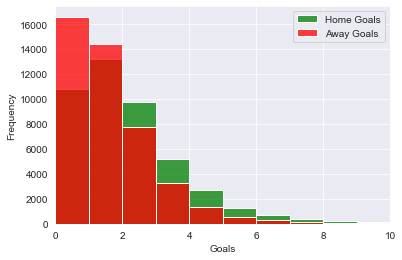

In [9]:
#1. ``home_score`` and ``away_score`` from the ``matches`` table.

ax3 = sns.histplot(data=matches, x='home_score', color='g', label='Home Goals', binwidth=1)
sns.histplot(data=matches, x='away_score', color='r', label='Away Goals', binwidth=1)
plt.ylabel('Frequency')
plt.xlabel('Goals')
plt.xlim(0, 10)
plt.legend()
plt.savefig('figures/score_histo.jpg')

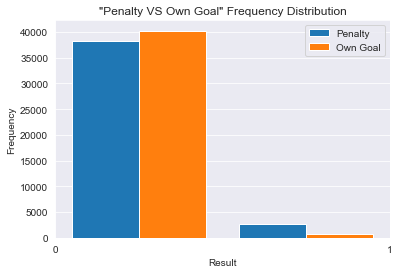

,Unnamed: 0,date,neutral,home_score,away_score,penalty,own_goal,home_goal,away_goal
0,0,1916-07-02,1,0,4,0,0,0,1
1,1,1916-07-02,1,0,4,0,0,0,1
2,2,1916-07-02,1,0,4,0,0,0,1
3,3,1916-07-02,1,0,4,0,0,0,1
4,4,1916-07-06,0,6,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
40954,40954,2022-12-18,1,3,3,0,0,1,0
40955,40955,2022-12-18,1,3,3,1,0,0,1
40956,40956,2022-12-18,1,3,3,0,0,0,1
40957,40957,2022-12-18,1,3,3,0,0,1,0


In [5]:
#2. ``penalty`` and ``own_goal`` from the ``num_cols`` table.

num_cols = pd.read_csv("created/num_cols.csv")

plt.hist([num_cols['penalty'], num_cols['own_goal']], bins=2, label=['Penalty', 'Own Goal'])
plt.xticks([0,1])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.title('"Penalty VS Own Goal" Frequency Distribution')
plt.legend()
plt.show()

num_cols

Text(0.5, 1.0, 'Kernel Density Plot of Sum of PENALTY')

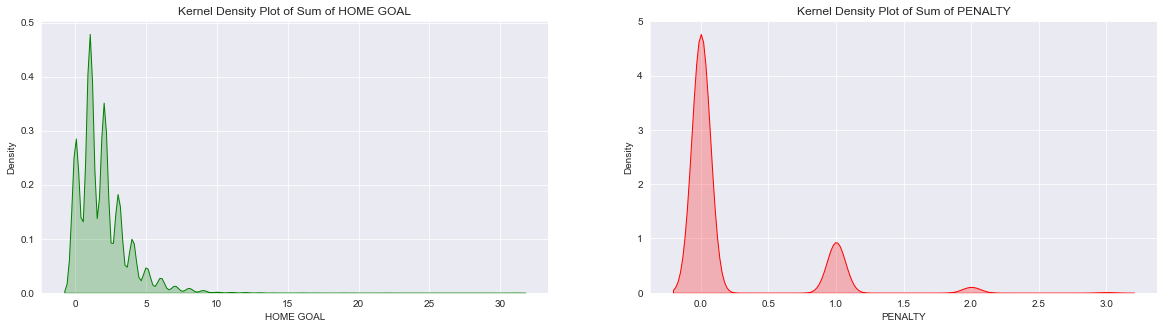

In [66]:
#3. Kernel Density plot of sum of ``home_goal`` and sum of ``penalty`` grouped by ``['date', 'home_team', 'away_team']`` ( this combination means one match)

all_goals_groupby = all_goals.groupby(["date", "home_team", "away_team"]).sum()[["home_goal", "penalty"]].reset_index()

fig, kdp_list = plt.subplots(ncols=2, figsize=(20,5))
sns.kdeplot(data=all_goals_groupby, x="home_goal", shade=True, ax=kdp_list[0], color="green")
kdp_list[0].set_xlabel("HOME GOAL")
kdp_list[0].set_ylabel("Density")
kdp_list[0].set_title("Kernel Density Plot of Sum of HOME GOAL")


sns.kdeplot(data=all_goals_groupby, x="penalty", shade=True, ax=kdp_list[1], color="red")
kdp_list[1].set_xlabel("PENALTY")
kdp_list[1].set_ylabel("Density")
kdp_list[1].set_title("Kernel Density Plot of Sum of PENALTY")


Text(0.5, 1.0, 'Kernel Density Plot of Sum of OWN GOAL')

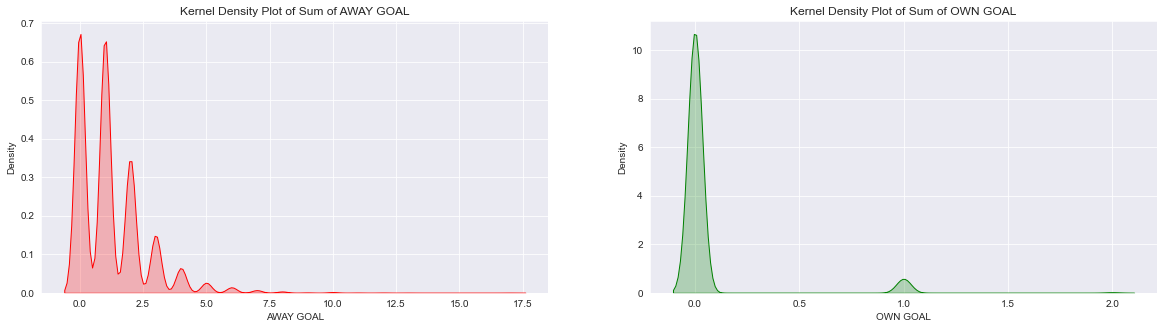

In [65]:
#4. Kernel Density plot of sum of ``away_goal`` and sum of ``own_goal`` grouped by ``['date', 'home_team', 'away_team']``

all_goals_groupby = all_goals.groupby(["date", "home_team", "away_team"]).sum()[["away_goal", "own_goal"]].reset_index()

fig, kdp_list = plt.subplots(ncols=2, figsize=(20,5))
sns.kdeplot(data=all_goals_groupby, x="away_goal", shade=True, ax=kdp_list[0], color="red")
kdp_list[0].set_xlabel("AWAY GOAL")
kdp_list[0].set_ylabel("Density")
kdp_list[0].set_title("Kernel Density Plot of Sum of AWAY GOAL")

sns.kdeplot(data=all_goals_groupby, x="own_goal", shade=True, ax=kdp_list[1], color="green")
kdp_list[1].set_xlabel("OWN GOAL")
kdp_list[1].set_ylabel("Density")
kdp_list[1].set_title("Kernel Density Plot of Sum of OWN GOAL")


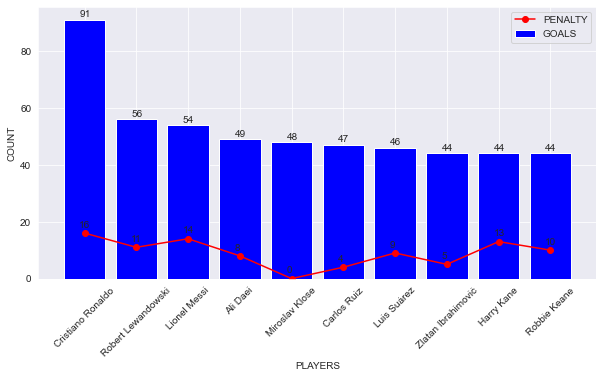

In [174]:
top_10_players = grouped_by_players.sort_values(by='total_goals', ascending=False).head(10)
top_10_players.reset_index()


fig, ax = plt.subplots(figsize=(10,5))

ax.bar(top_10_players["scorer"], top_10_players["total_goals"], label="GOALS", color="blue")
ax.plot(top_10_players["scorer"], top_10_players["penalty"], color="red", marker="o", label="PENALTY")

for x,y in enumerate(top_10_players["total_goals"]):
    ax.text(x-0.1,y+1,str(y))
for x,y in enumerate(top_10_players["penalty"]):
    ax.text(x-0.1,y+2,str(y))

plt.legend()
plt.xticks(rotation=45)
plt.ylabel("COUNT")
plt.xlabel("PLAYERS")
plt.show()
